## Setup

In [1]:
%matplotlib inline
from IPython.display import display, HTML

# External modules
import numpy as np
import os
from pathlib import Path

# Path management
main_dir = str(Path(os.path.abspath('')).parents[0])
os.chdir(main_dir)
print('main dir:',main_dir)

main dir: /Users/pablo/OneDrive/data-science/github/transportAI


In [2]:
# Internal modules
from src import transportAI as tai

main dir: /Users/pablo/OneDrive/data-science/github/transportAI


In [3]:
# Common parameters
_BILEVEL_ITERS = 10
_SD_X = 0
_SEED = 2022

In [4]:
list_experiments  = ['monotonicity','pseudoconvexity','convergence','biased_reference_od']
run_experiment = dict.fromkeys(list_experiments,True)

## Build networks

In [5]:
small_networks = []

network_generator = tai.factory.NetworkGenerator()

network_names = ['Toy', 'Yang', 'Lo', 'Wang']

# Get dictionaries with adjacency and O-D matrices for a set of custom networks.
As,Qs = network_generator.get_A_Q_custom_networks(network_names)

# Create transportation network using adjacency matrices
for i in network_names:
    small_networks.append(network_generator.build_network(A = As[i], network_name= i))


Creating Toy network

Nodes: 4, Links: 4

Creating Yang network

Nodes: 9, Links: 14

Creating Lo network

Nodes: 6, Links: 14

Creating Wang network

Nodes: 4, Links: 8


## Link performance functions

In [6]:
# Create data generator to generate link attributes
linkdata_generator = tai.factory.LinkDataGenerator()

for small_network in small_networks:
    if small_network.key == 'Yang':
        bpr_parameters_df = linkdata_generator.generate_Yang_bpr_parameters()
    elif small_network.key == 'Lo':
        bpr_parameters_df=linkdata_generator.generate_LoChan_bpr_parameters()
    elif small_network.key == 'Wang':
        bpr_parameters_df=linkdata_generator.generate_Wang_bpr_parameters()
    elif small_network.key == 'Toy':
        bpr_parameters_df = linkdata_generator.generate_toy_bpr_parameters()

    # Set BPR parameters
    small_network.set_bpr_functions(bpr_parameters_df)

## OD matrix

In [7]:
for small_network in small_networks:
    small_network.load_OD(Q  = Qs[small_network.key])

600.0 trips were loaded among 3 o-d pairs
1160.0 trips were loaded among 9 o-d pairs
4000.0 trips were loaded among 12 o-d pairs
43886.0 trips were loaded among 12 o-d pairs


## Paths

In [8]:
paths_generator = tai.factory.PathsGenerator()

for small_network in small_networks:
    print('\n'+small_network.key, 'network', '\n')
    # With k>=4 shortest paths, all acyclic path of the networks are included in the path sets
    paths_generator.load_k_shortest_paths(network = small_network, k=4)


Toy network 

Generating at most 4 paths per od
6 paths were generated among 3 od pairs in 0.0 [s]
6 paths were loaded in the network
Updating incidence matrices
Matrix D (4, 6) generated in 0.0[s] 100.0% 
Matrix M (3, 6) generated in 0.0[s] 100.0% 
Matrix C (6, 6) generated in 0.0[s]

Yang network 

Generating at most 4 paths per od
26 paths were generated among 9 od pairs in 0.0 [s]
26 paths were loaded in the network
Updating incidence matrices
Matrix D (14, 26) generated in 0.0[s]00.0% 
Matrix M (9, 26) generated in 0.0[s]100.0% 
Matrix C (26, 26) generated in 0.0[s]

Lo network 

Generating at most 4 paths per od
44 paths were generated among 12 od pairs in 0.0 [s]
44 paths were loaded in the network
Updating incidence matrices
Matrix D (14, 44) generated in 0.0[s]00.0% 
Matrix M (12, 44) generated in 0.0[s]00.0% 
Matrix C (44, 44) generated in 0.0[s]

Wang network 

Generating at most 4 paths per od
24 paths were generated among 12 od pairs in 0.0 [s]
24 paths were loaded in the

## Descriptive statistics

In [9]:
tai.descriptive_statistics.summary_table_networks(small_networks)

,network,nodes,links,ods,paths
0,Toy,4,4,3,6
1,Yang,9,14,9,26
2,Lo,6,14,12,44
3,Wang,4,8,12,24


In [10]:
for network in small_networks:
    print('\n' + network.key)
    display(network.Z_data)


Toy


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,0.25,100.0
1,LWRLK,0.15,4.0,0.50,200.0
2,LWRLK,0.15,4.0,0.75,300.0
3,LWRLK,0.15,4.0,1.00,400.0



Yang


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,2.0,280.0
1,LWRLK,0.15,4.0,1.5,290.0
2,LWRLK,0.15,4.0,3.0,280.0
3,LWRLK,0.15,4.0,1.0,280.0
4,LWRLK,0.15,4.0,1.0,600.0
5,LWRLK,0.15,4.0,2.0,300.0
6,LWRLK,0.15,4.0,2.0,500.0
7,LWRLK,0.15,4.0,1.0,400.0
8,LWRLK,0.15,4.0,1.5,500.0
9,LWRLK,0.15,4.0,1.0,700.0



Lo


,link_type,alpha,beta,tf,k
0,LWRLK,0.15,4.0,7.6,600.0
1,LWRLK,0.15,4.0,7.6,600.0
2,LWRLK,0.15,4.0,7.6,600.0
3,LWRLK,0.15,4.0,7.6,600.0
4,LWRLK,0.15,4.0,7.6,600.0
5,LWRLK,0.15,4.0,7.6,600.0
6,LWRLK,0.15,4.0,7.6,600.0
7,LWRLK,0.15,4.0,7.6,600.0
8,LWRLK,0.15,4.0,7.6,600.0
9,LWRLK,0.15,4.0,7.6,600.0



Wang


,link_type,alpha,beta,tf,k
0,LWRLK,0.1450,3.5,0.1162,4149.0
1,LWRLK,0.0988,2.7,0.1016,9683.0
2,LWRLK,0.1450,3.5,0.1162,4149.0
3,LWRLK,0.1242,3.5,0.1332,7961.0
4,LWRLK,0.1242,3.5,0.1332,7961.0
5,LWRLK,0.1035,2.7,0.0667,8685.0
6,LWRLK,0.0988,2.7,0.1016,9683.0
7,LWRLK,0.1035,2.7,0.0667,8685.0


## Experiments

### a) Monotonicity of traffic count functions


Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 90.0%
Proportion of links over capacity: 25.0%
Normalized RMSE: 0.0
Progress: |████████████████████| 100.0% 

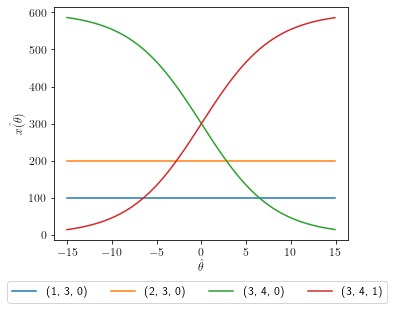


Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 52.1%
Proportion of links over capacity: 0.0%
Normalized RMSE: 0.0
Progress: |████████████████████| 100.0% 

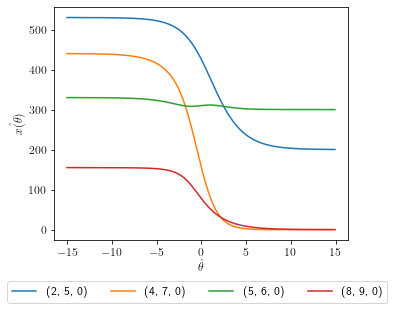


Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 101.2%
Proportion of links over capacity: 42.9%
Normalized RMSE: 0.0
Progress: |████████████████████| 100.0% 

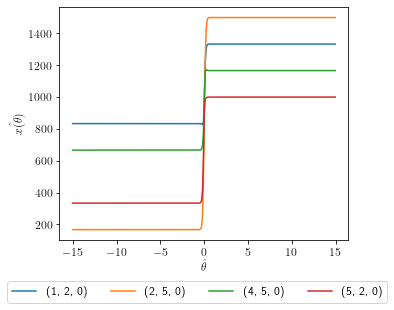


Generating synthetic link counts via Frank-Wolfe

SUE via fw (max iters: 0)
Ratio of counts versus capacity: 138.3%
Proportion of links over capacity: 100.0%
Normalized RMSE: 0.0
Progress: |████████████████████| 100.0% 

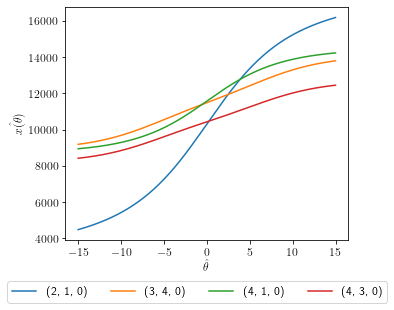

In [11]:
if run_experiment['monotonicity']:

    equilibrator = tai.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-10,
        uncongested_mode = True
    )

    utility_function = tai.estimation.UtilityFunction(features_Y=['tt'], true_values={'tt': -1})

    monotonicity_experiments = tai.experiments.MonotonicityExperiments(
        seed = _SEED,
        name = 'Monotonicity Experiment',
        utility_function = utility_function,
        linkdata_generator=tai.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator = equilibrator,
        networks = small_networks)

    monotonicity_experiments.run(grid=list(np.arange(-15, 15, 0.1)), feature='tt')

### b) Pseudoconvexity of objective function


Pseudo-convexity Experiment
Toy network

Performing grid search for tt

Progress: |████████████████████| 100.0% 

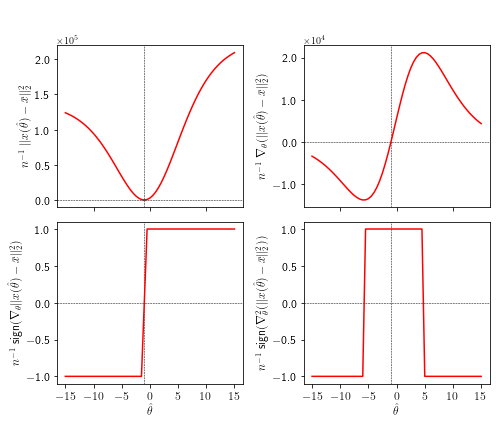

Yang network

Performing grid search for tt

Progress: |████████████████████| 100.0% 

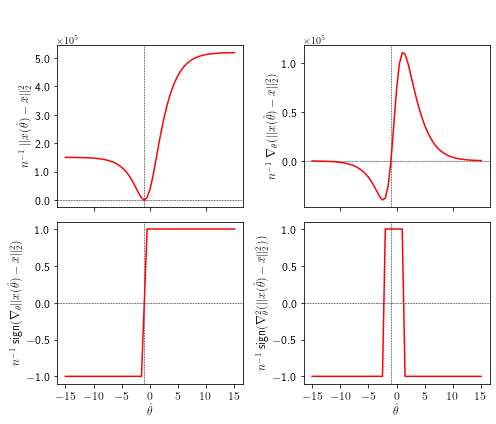

Lo network

Performing grid search for tt

Progress: |████████████████████| 100.0% 

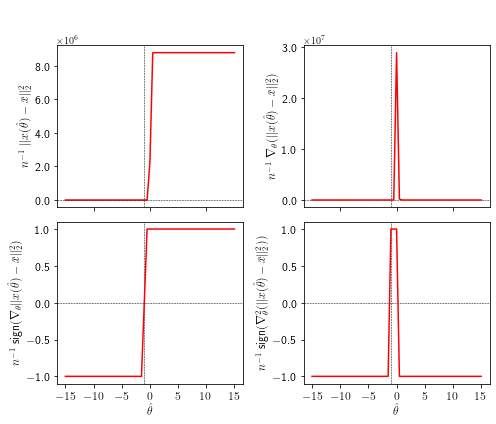

Wang network

Performing grid search for tt

Progress: |████████████████████| 100.0% 

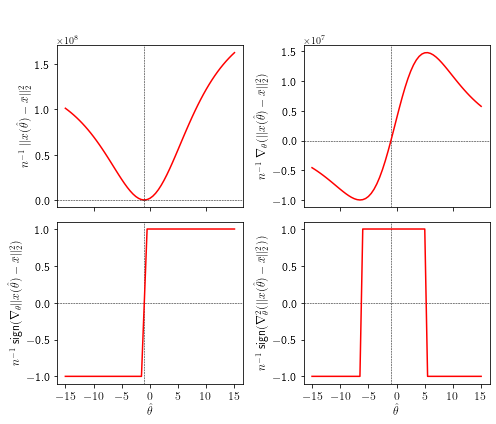

Plot of objective function in the four networks


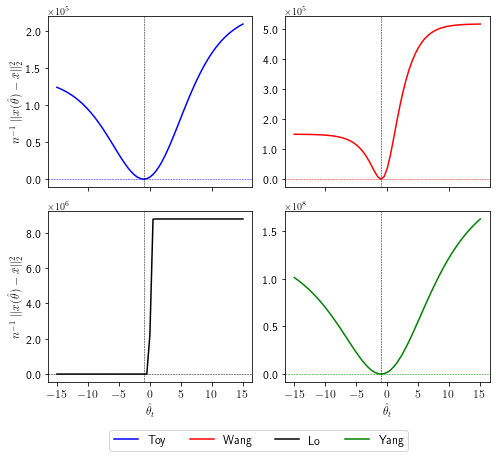

In [12]:
    equilibrator = tai.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-10,
        uncongested_mode = True
    )

    utility_function = tai.estimation.UtilityFunction(features_Y=['tt'], true_values={'tt': -1})

    pseudoconvexity_experiments = tai.experiments.PseudoconvexityExperiments(
        seed = _SEED,
        name = 'Pseudo-convexity Experiment',
        utility_function = utility_function,
        linkdata_generator = tai.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator = equilibrator,
        networks = small_networks)

    pseudoconvexity_experiments.run(grid = list(np.arange(-15, 15+0.1, 0.5)), feature = 'tt')

## c) Convergence Experiment


Convergence Experiment

Methods: ['ngd', 'lm']


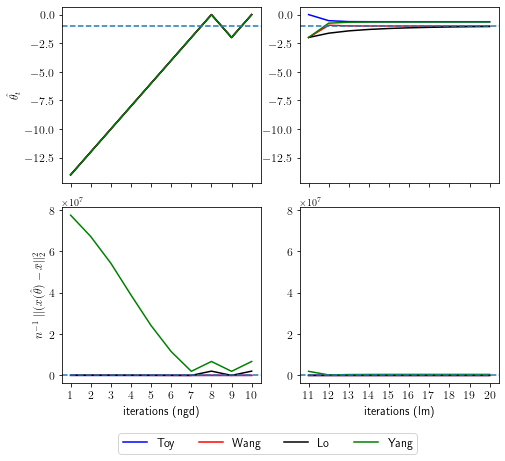


Methods: ['lm', 'ngd']


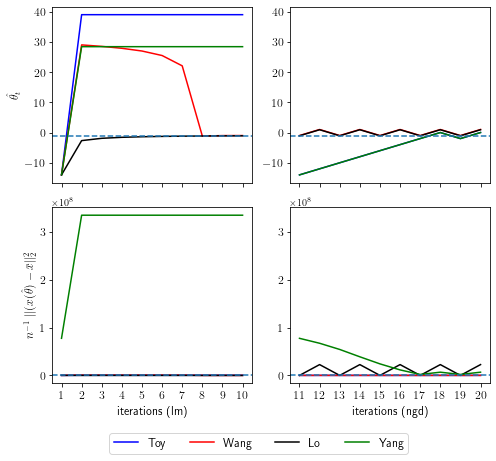

In [13]:
if run_experiment['convergence']:

    equilibrator = tai.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-10,
        uncongested_mode = False,
        paths_generator=paths_generator
    )

    utility_function = tai.estimation.UtilityFunction(
        features_Y=['tt'],
        initial_values={'tt': -14},
        true_values={'tt': -1e-0}
    )

    outer_optimizer_norefined = tai.estimation.OuterOptimizer(
        method='ngd',
        iters=1,
        eta=2
    )

    outer_optimizer_refined = tai.estimation.OuterOptimizer(
        # method='gauss-newton',
        method='lm',
        # lambda_lm=0,
        iters=1,
    )

    convergence_experiments = tai.experiments.ConvergenceExperiments(
        seed=_SEED,
        name='Convergence Experiment',
        outer_optimizers=[outer_optimizer_norefined, outer_optimizer_refined],
        utility_function= utility_function,
        linkdata_generator=tai.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x':_SD_X}),
        equilibrator=equilibrator,
        bilevel_iters=_BILEVEL_ITERS,
        networks=small_networks)

    convergence_experiments.run()

## d) Bias in Reference OD matrix


Scenario: true_od

Statistical Inference in No Refined Stage

Bilevel optimization for Yang network 

Initial theta: {'tt': '-1.4E+01'}
Initial objective: 14,210
Initial RMSE: 53.3
Initial Normalized RMSE: 0.23

Iterations: |████████████████████| 10/10
Summary results of bilevel optimization
best iter: 7
best theta: {'tt': '-2.0E+00'}
best objective_value: 811
Final best objective improvement: 94.29%
Final best objective improvement value: 13,399.5
Best RMSE: 12.7
Best Normalized RMSE: 0.055
Total time: 0.2 [s]

Performing hypothesis testing (H0: theta = 0, alpha = 0.05)
Hessian approximated as J^T J

Summary of parameters: 
 parameter    est               CI  width_CI  t-test  p-value
       tt -2.000 [-2.517, -1.483]     0.517 -10.749    0.000

Computing F-test

Summary of model: 
      F  critical-F     p  n  dof_m1  dof_m2    sse_m1   sse_m2
59.619       7.709 0.002  5       0       1 23312.114 1465.727
Time: 0.0[s]

Statistical Inference in Refined Stage

Bilevel optimization for

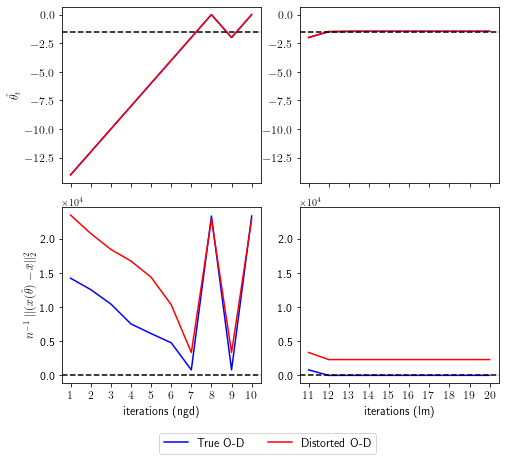

In [14]:
if run_experiment['biased_reference_od']:

    equilibrator = tai.equilibrium.LUE_Equilibrator(
        max_iters=100,
        method='fw',
        iters_fw=100,
        accuracy=1e-100,
        uncongested_mode = False,
        paths_generator=paths_generator
    )

    utility_function = tai.estimation.UtilityFunction(features_Y=['tt'],
                                                      initial_values={'tt': -14},
                                                      true_values={'tt': -1.5})

    outer_optimizer_norefined = tai.estimation.OuterOptimizer(
        method='ngd',
        iters=1,
        eta=2e0
    )

    outer_optimizer_refined = tai.estimation.OuterOptimizer(
        # method='gauss-newton',
        method='lm',
        # lambda_lm = 0,
        iters=1
    )

    Yang_network = [network for network in small_networks if network.key == 'Yang'][0]

    # As in Yang paper, traffic counts from 5 links are considered for estimation

    bias_reference_od_experiment = tai.experiments.BiasReferenceODExperiment(
        seed=_SEED,
        name='Bias OD Experiment',
        outer_optimizers=[outer_optimizer_norefined, outer_optimizer_refined],
        utility_function=utility_function,
        linkdata_generator=tai.factory.LinkDataGenerator(noise_params={'mu_x': 0, 'sd_x': _SD_X}),
        equilibrator= equilibrator,
        bilevel_iters = _BILEVEL_ITERS,
        network= Yang_network)

    bias_reference_od_experiment.run(distorted_Q = network_generator.get_A_Q_custom_networks(['Yang2'])[1]['Yang2'])